In [21]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("src")
sys.path.append("../src")

import rna_transform.utils as utils
import rna_transform.rna_utils as rna_utils

from qspright.utils import dec_to_qary_vec

In [2]:
q = 4
positions = rna_utils.RNA_POSITIONS

# positions += [3,4]
# rna_utils.RNA_POSITIONS = positions

n = len(positions)

print("n = {}, N = {}".format(n, n ** q))

n = 8, N = 4096


### get Lasso coefficients

In [3]:
# emp_beta_lasso = rna_utils.calculate_rna_lasso(save=True)

In [4]:
# Calculate fraction of variance explained by empirical coefficients
# bm_fv_lasso = utils.calc_frac_var_explained(emp_beta_lasso)

### get GWHT coefficients

In [43]:
emp_beta_gwht = rna_utils.calculate_rna_gwht(save=True)

Loaded saved RNA data.
Finding GWHT coefficients
Found GWHT coefficients


In [44]:
# Calculate fraction of variance explained by empirical coefficients
bm_fv_gwht = utils.calc_frac_var_explained(emp_beta_gwht)

### get GWHT coefficients with QSPRIGHT

In [45]:
emp_beta_qspright = rna_utils.calculate_rna_qspright(save=False, noise_sd = 250)
print("found sparsity = ", np.sum(np.abs(emp_beta_qspright) > 1e-5))
print("Ratio of Explained Power = ", 1 - np.linalg.norm(emp_beta_gwht - emp_beta_qspright)**2/np.linalg.norm(emp_beta_gwht)**2)

Loaded saved RNA data.
Finding GWHT coefficients with QSPRIGHT
b =  4
cutoff =  51200.0000000001
Found GWHT coefficients
found sparsity =  135
Ratio of Explained Power =  0.864910627265502


In [46]:
# Calculate fraction of variance explained by empirical coefficients
bm_fv_qspright = utils.calc_frac_var_explained(emp_beta_qspright)

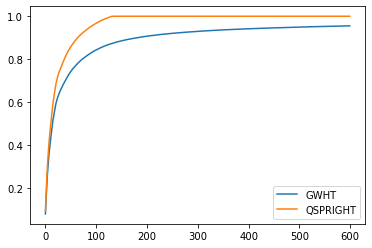

In [47]:
# plt.plot(bm_fv_lasso[:300], label = "Fourier")
plt.plot(bm_fv_gwht[:600], label = "GWHT")
plt.plot(bm_fv_qspright[:600], label = "QSPRIGHT")
plt.legend()
plt.show()

### compare indices with most energy

In [50]:
beta_power = np.abs(emp_beta_gwht) ** 2
for _ in range(30):
    ind = beta_power.argmax()
    print(beta_power[ind], np.array(dec_to_qary_vec([ind], n = n, q=q))[:, 0])
    beta_power[ind] = 0

20052.771485295565 [0 0 0 0 0 2 0 0]
13400.77811370529 [2 0 0 0 0 0 0 2]
11352.977657894078 [0 0 0 0 0 0 1 0]
11352.977657894078 [0 0 0 0 0 0 3 0]
10392.68684201875 [0 0 0 2 0 0 0 0]
7624.427416547038 [0 0 2 0 0 0 0 0]
7386.3432714296605 [0 0 1 0 0 0 0 0]
7386.3432714296605 [0 0 3 0 0 0 0 0]
5540.936343287297 [0 0 0 0 0 1 0 0]
5540.936343287297 [0 0 0 0 0 3 0 0]
5264.666776567108 [1 0 0 0 0 0 0 1]
5264.666776567108 [3 0 0 0 0 0 0 3]
4697.893286874121 [0 1 0 0 0 0 0 0]
4697.893286874121 [0 3 0 0 0 0 0 0]
4559.090990385492 [0 0 0 0 0 0 0 1]
4559.090990385492 [0 0 0 0 0 0 0 3]
3476.537197663604 [2 0 0 0 0 0 0 1]
3476.537197663604 [2 0 0 0 0 0 0 3]
3379.6055131538865 [2 0 0 0 0 0 0 0]
3183.403958498384 [0 1 1 0 0 0 0 0]
3183.403958498384 [0 3 3 0 0 0 0 0]
2885.6205769418443 [0 0 0 0 0 0 0 2]
2160.3612646306547 [0 0 0 0 2 0 0 0]
2021.527577272492 [0 0 1 0 0 1 0 0]
2021.527577272492 [0 0 3 0 0 3 0 0]
1568.3010116008911 [1 0 0 0 0 0 0 2]
1568.3010116008911 [3 0 0 0 0 0 0 2]
1545.8412536500161

In [53]:
beta_power = np.abs(emp_beta_qspright) ** 2
for _ in range(30):
    ind = beta_power.argmax()
    print(beta_power[ind], np.array(dec_to_qary_vec([ind], n = n, q=q))[:, 0])
    beta_power[ind] = 0

20154.84902876585 [0 0 0 0 0 2 0 0]
13317.290700470223 [2 0 0 0 0 0 0 2]
11362.760388445531 [0 0 0 0 0 0 1 0]
11362.760388445531 [0 0 0 0 0 0 3 0]
10154.81621224876 [0 0 0 2 0 0 0 0]
7746.837626471069 [0 0 2 0 0 0 0 0]
7537.4750523137145 [0 0 1 0 0 0 0 0]
7537.4750523137145 [0 0 3 0 0 0 0 0]
5398.99562380179 [0 0 0 0 0 1 0 0]
5398.99562380179 [0 0 0 0 0 3 0 0]
5210.414804038753 [1 0 0 0 0 0 0 1]
5210.414804038751 [3 0 0 0 0 0 0 3]
4799.115828424447 [0 3 0 0 0 0 0 0]
4799.115828424445 [0 1 0 0 0 0 0 0]
4460.190826766415 [0 0 0 0 0 0 0 1]
4460.190826766415 [0 0 0 0 0 0 0 3]
3562.5458579139204 [2 0 0 0 0 0 0 1]
3562.5458579139195 [2 0 0 0 0 0 0 3]
3340.968317547651 [2 0 0 0 0 0 0 0]
3268.5095262409145 [0 1 1 0 0 0 0 0]
3268.5095262409136 [0 3 3 0 0 0 0 0]
2687.9619993851447 [0 0 0 0 0 0 0 2]
2205.3979681133446 [0 0 0 0 2 0 0 0]
2049.279774521657 [0 0 1 0 0 1 0 0]
2049.279774521657 [0 0 3 0 0 3 0 0]
1673.8920759510768 [1 0 0 0 0 0 0 2]
1673.8920759510768 [3 0 0 0 0 0 0 2]
1597.734087656417